In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashion-retail-sales/Fashion_Retail_Sales.csv


In [2]:
df = pd.read_csv('/kaggle/input/fashion-retail-sales/Fashion_Retail_Sales.csv')
df

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,05-02-2023,NaN,Credit Card
1,4115,Tunic,2456.0,11-07-2023,2.0,Credit Card
2,4019,Tank Top,2102.0,23-03-2023,4.1,Cash
3,4097,Leggings,3126.0,15-03-2023,3.2,Cash
4,3997,Wallet,3003.0,27-11-2022,4.7,Cash
...,...,...,...,...,...,...
3395,4118,Shorts,37.0,09-07-2023,2.7,Cash
3396,4056,Slippers,176.0,16-03-2023,2.5,Cash
3397,3991,Onesie,NaN,03-10-2022,2.4,Credit Card
3398,4042,Sandals,128.0,01-01-2023,1.8,Cash


In [3]:
print(df.info())
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Reference ID  3400 non-null   int64  
 1   Item Purchased         3400 non-null   object 
 2   Purchase Amount (USD)  2750 non-null   float64
 3   Date Purchase          3400 non-null   object 
 4   Review Rating          3076 non-null   float64
 5   Payment Method         3400 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 159.5+ KB
None


Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)    650
Date Purchase              0
Review Rating            324
Payment Method             0
dtype: int64

In [4]:
df['Purchase Amount (USD)'] = df['Purchase Amount (USD)'].fillna(df['Purchase Amount (USD)'].mean()).round(2)

In [5]:
df['Review Rating'] = df['Review Rating'].fillna(df['Review Rating'].mean()).round(2)

In [6]:
df.isna().sum()

Customer Reference ID    0
Item Purchased           0
Purchase Amount (USD)    0
Date Purchase            0
Review Rating            0
Payment Method           0
dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
cols = ['Customer Reference ID', 'Item Purchased', 'Purchase Amount (USD)',
       'Date Purchase', 'Review Rating', 'Payment Method']

In [9]:
sns.set_theme()

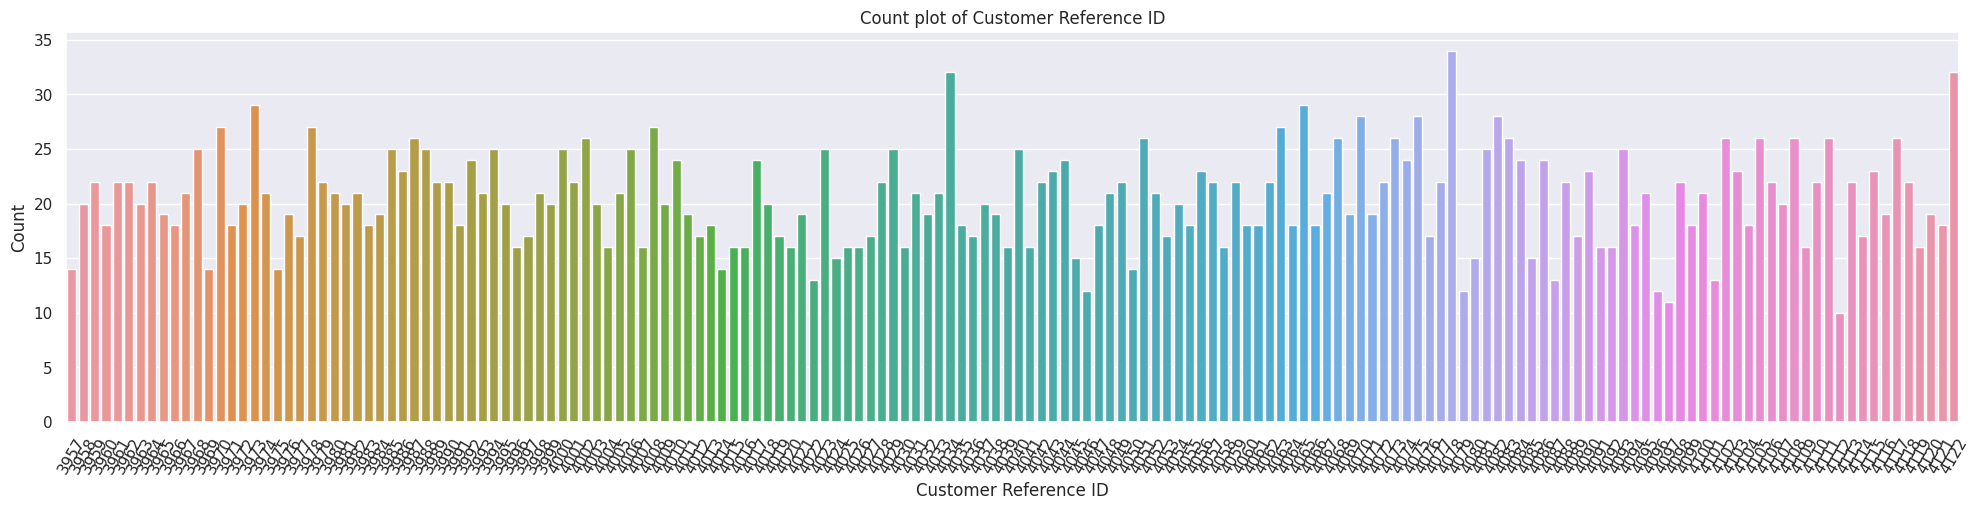

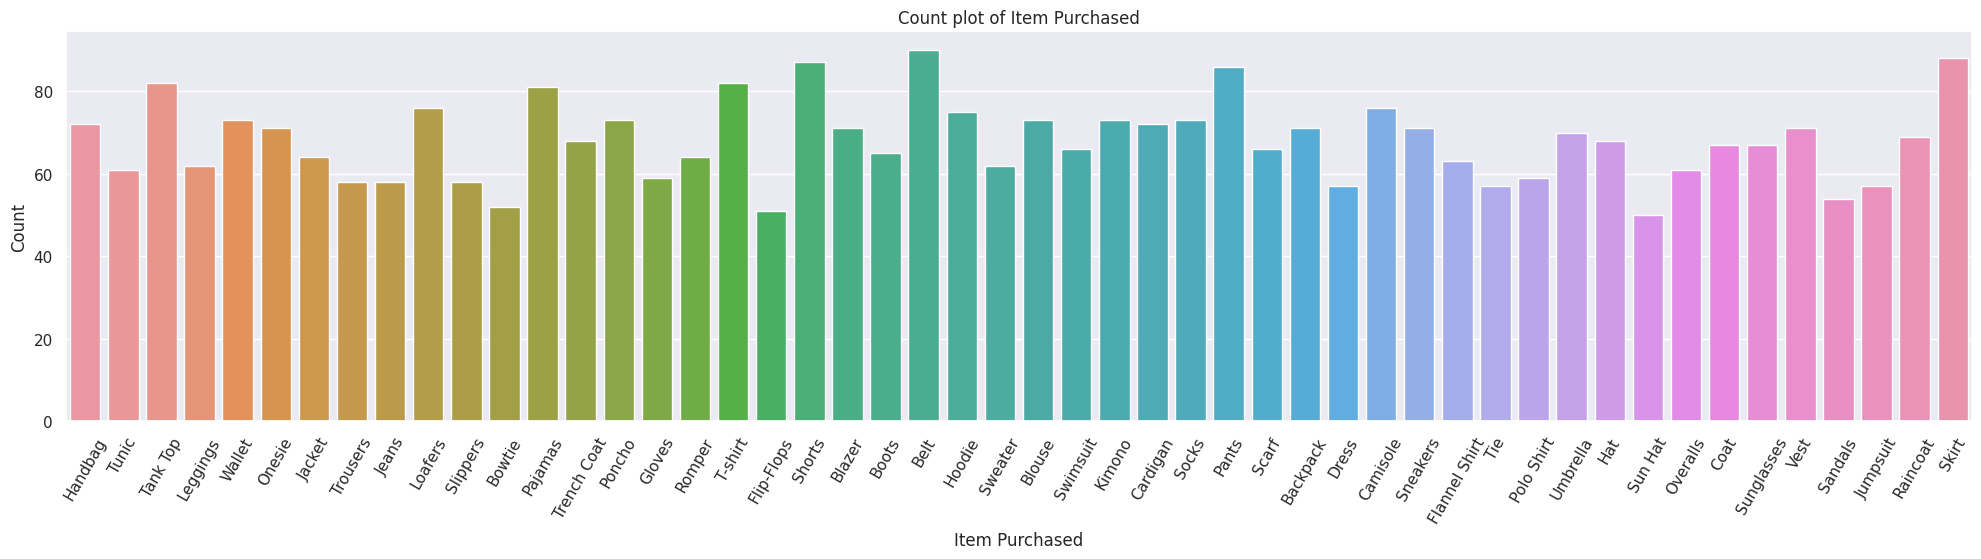

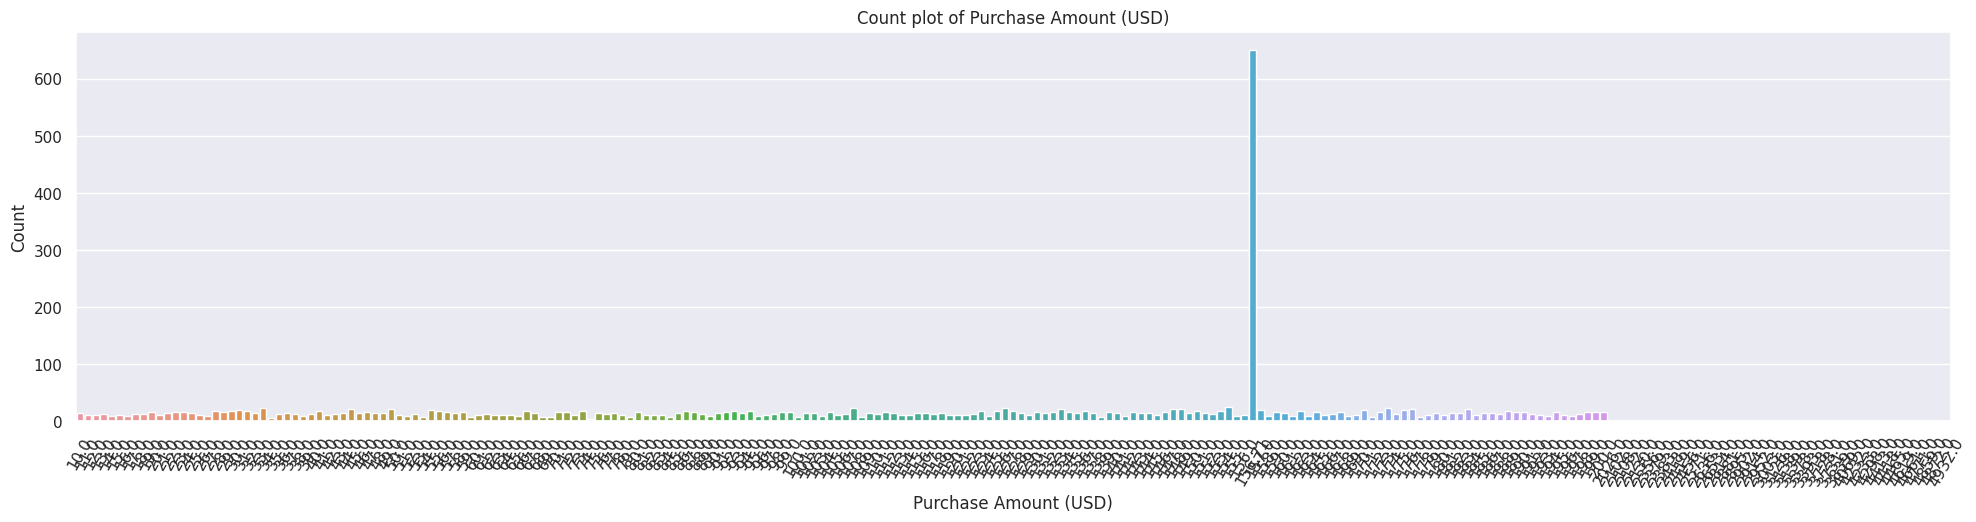

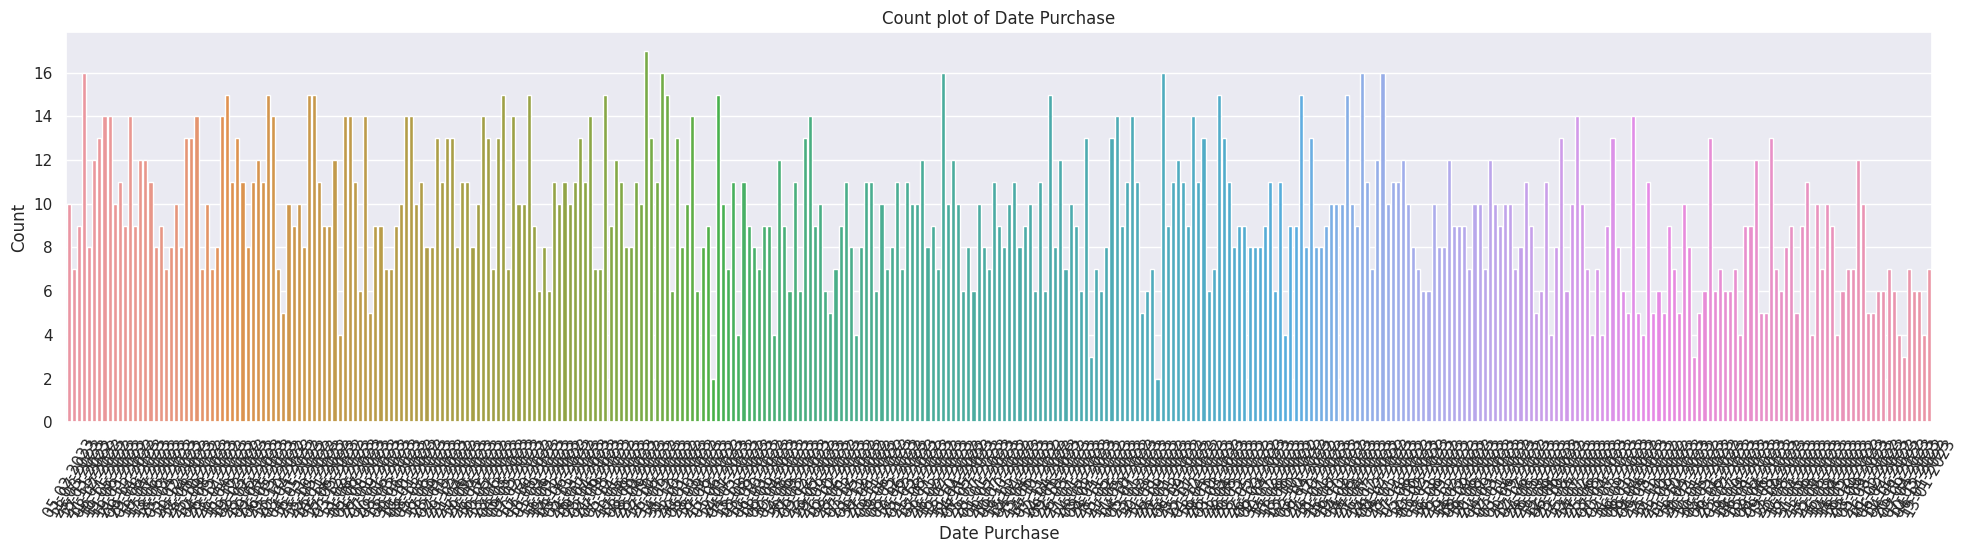

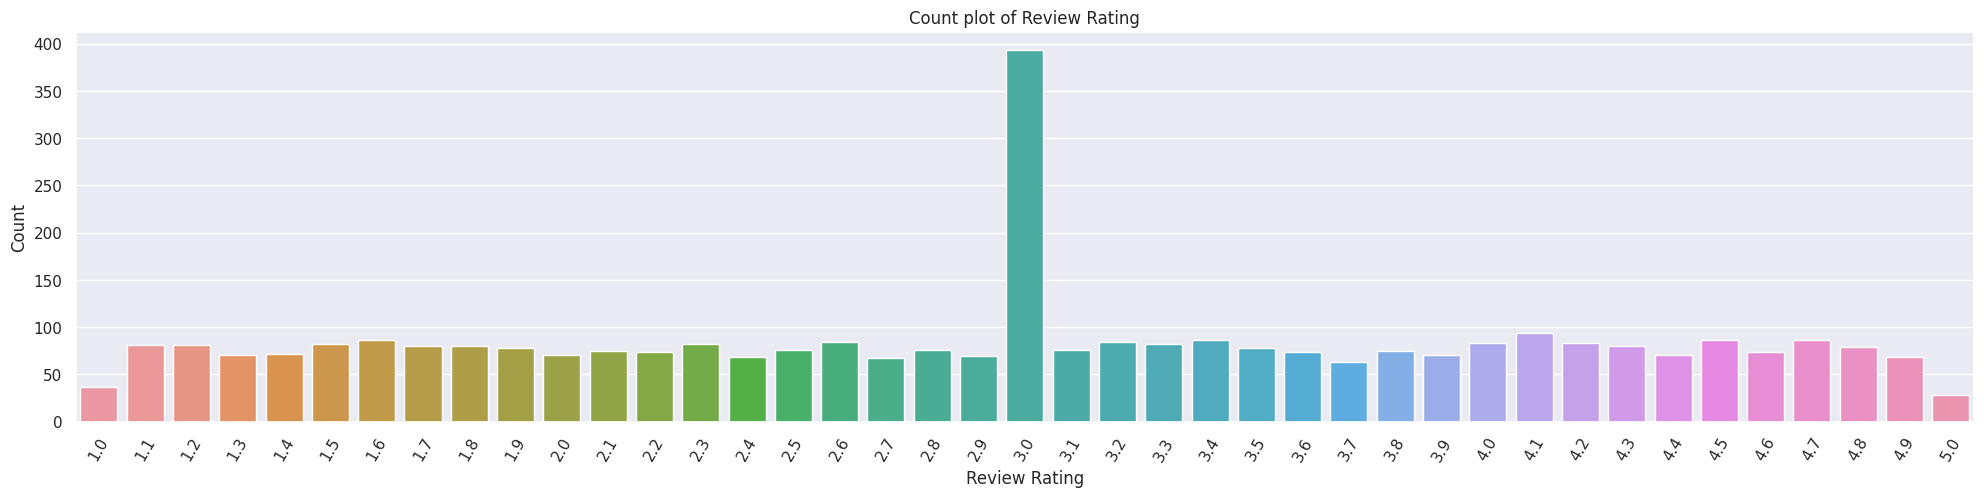

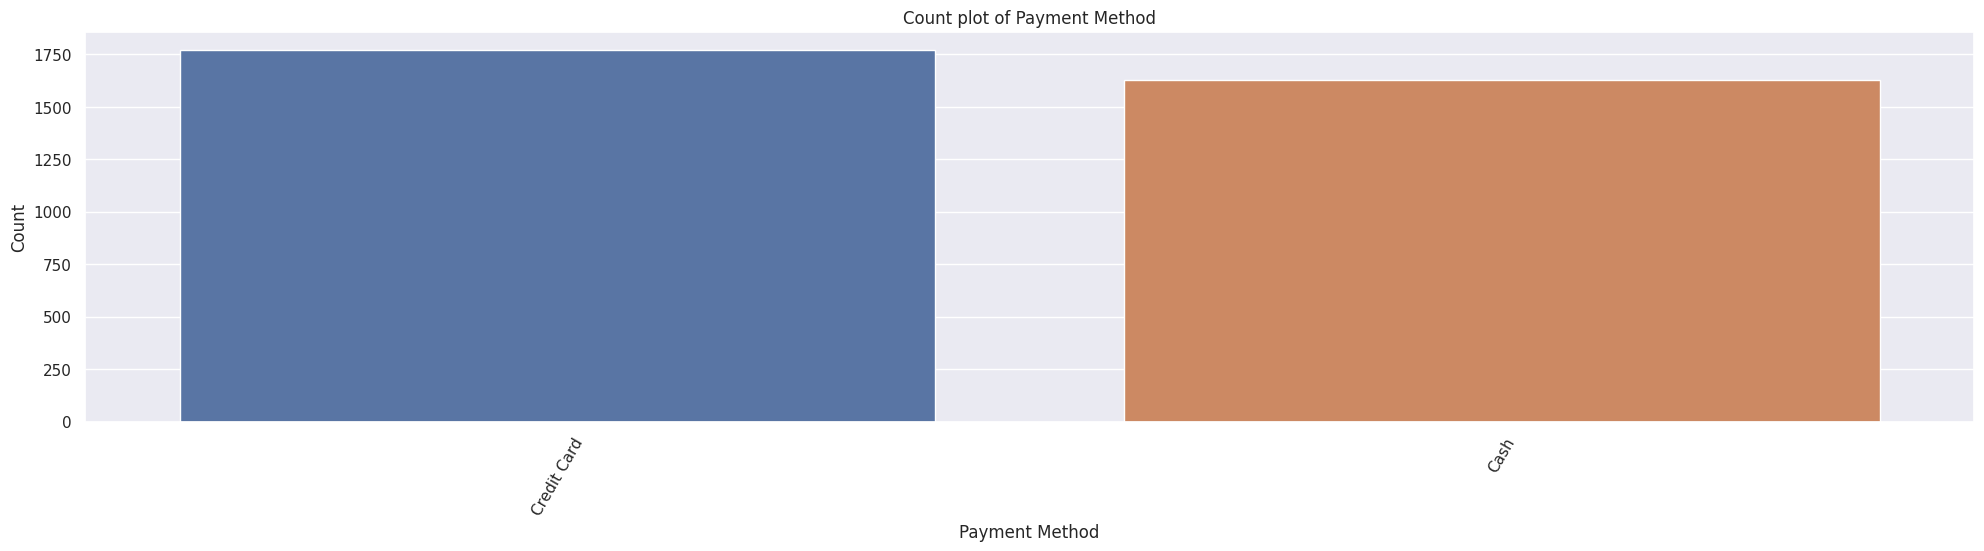

In [10]:
for features in cols:
    if features in df.columns:
        plt.figure(figsize=(20,5))
        sns.countplot(x=features,data=df)
        plt.title(f'Count plot of {features}')
        plt.xlabel(features)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.xticks(rotation=60)
        plt.show()

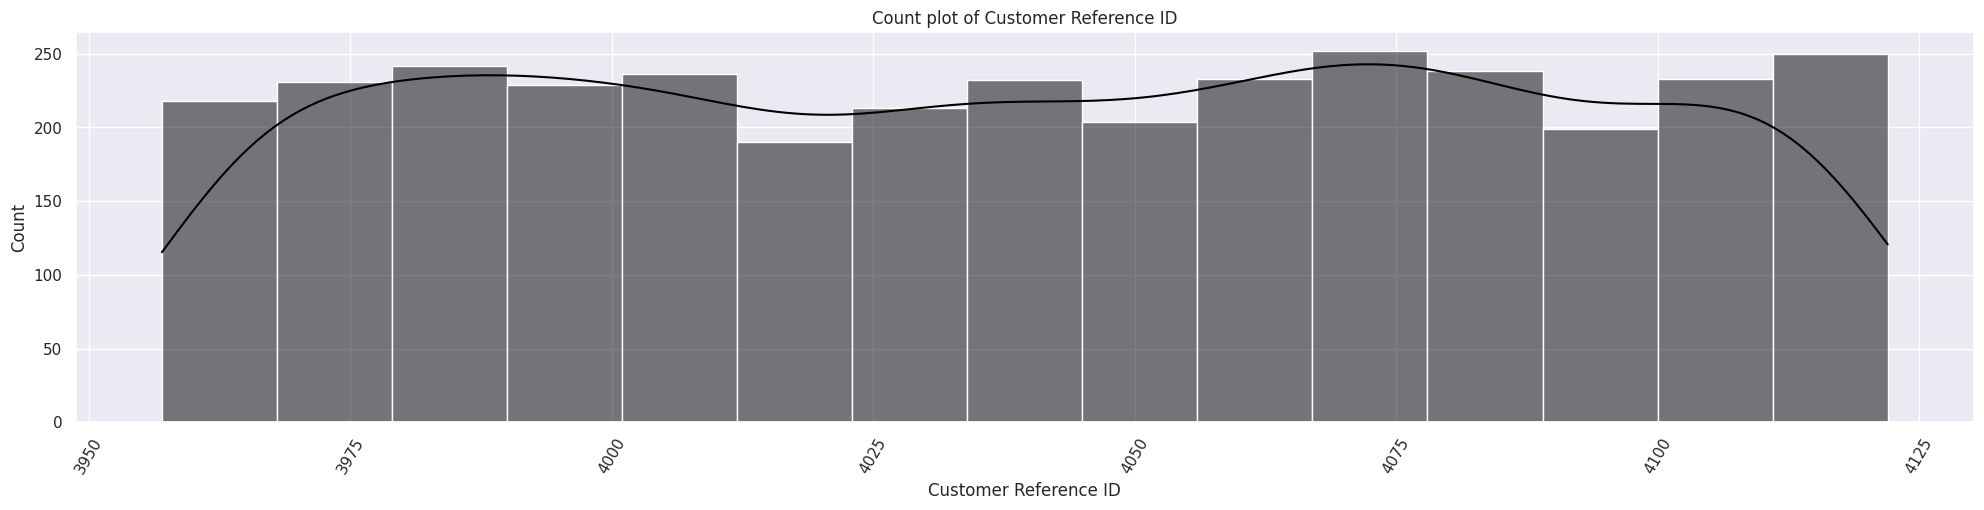

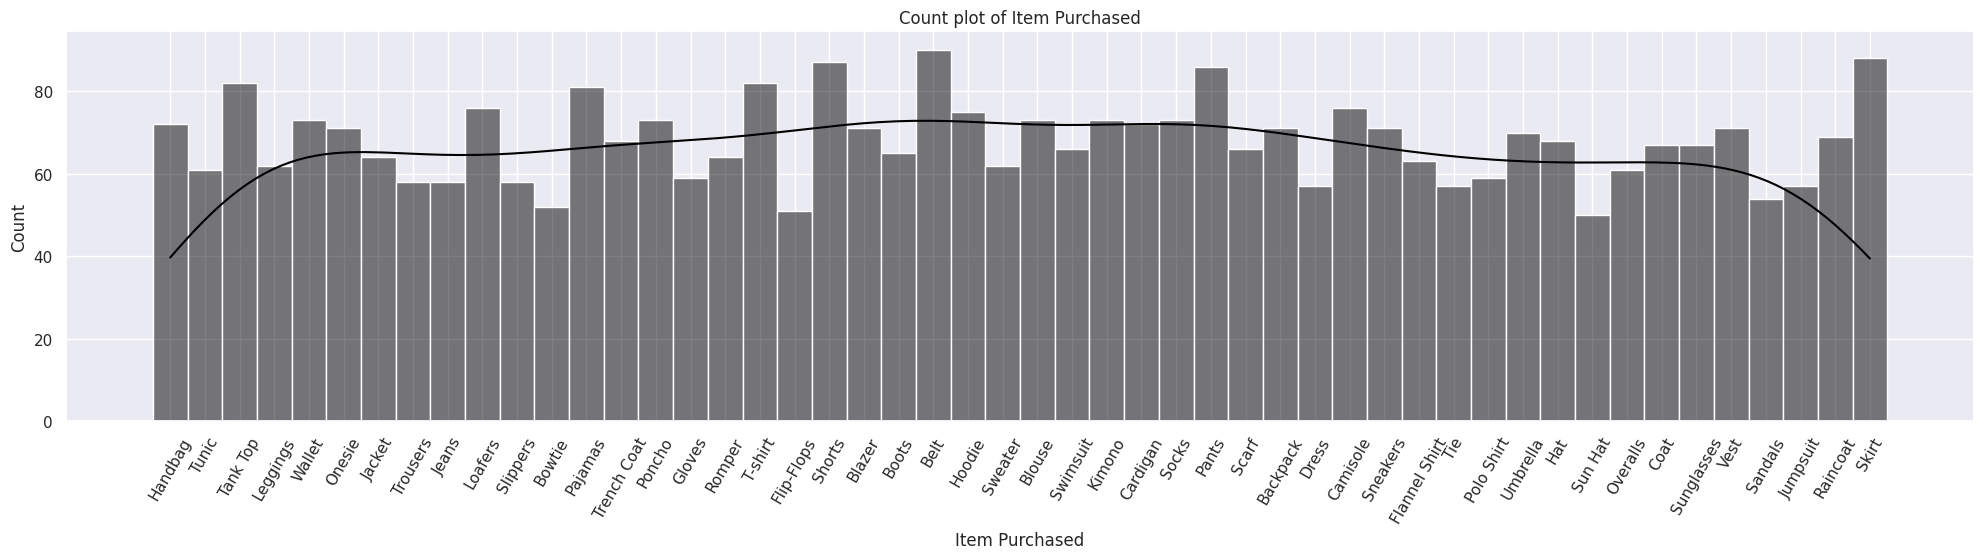

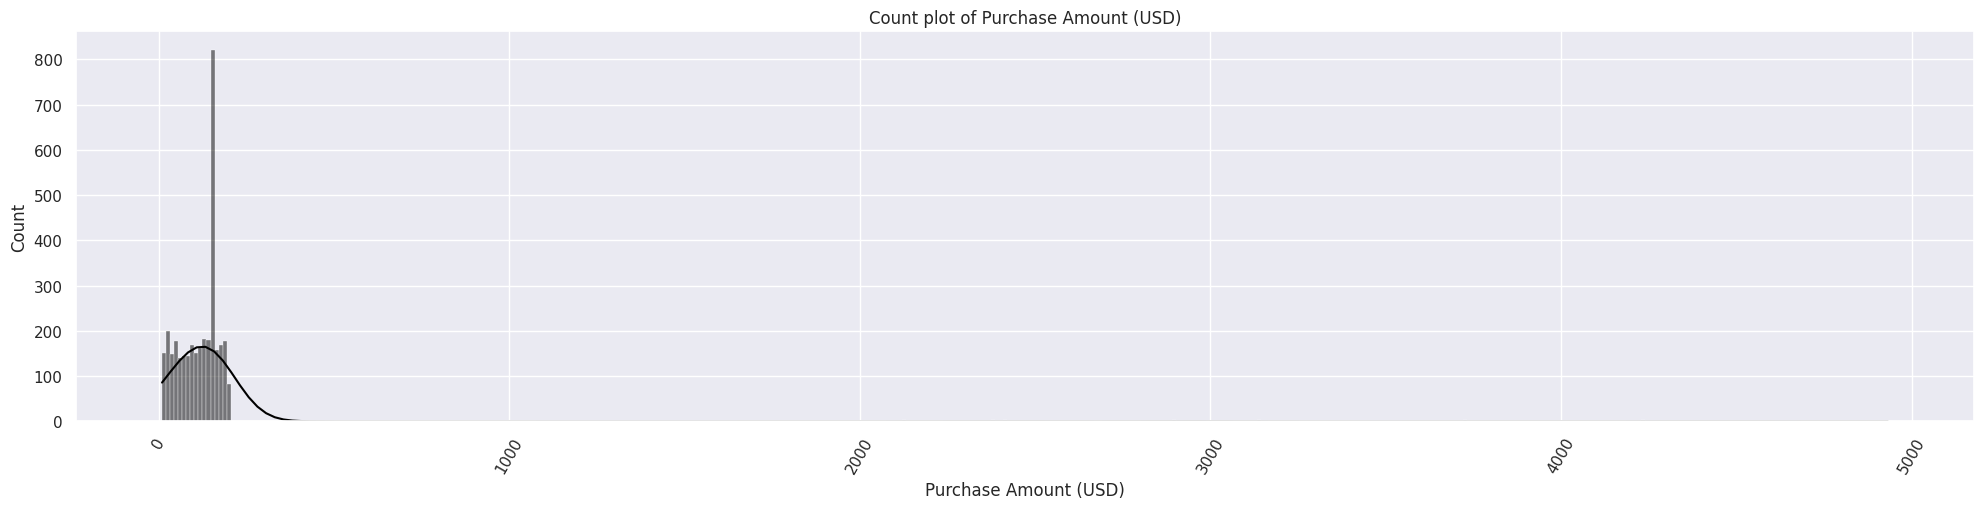

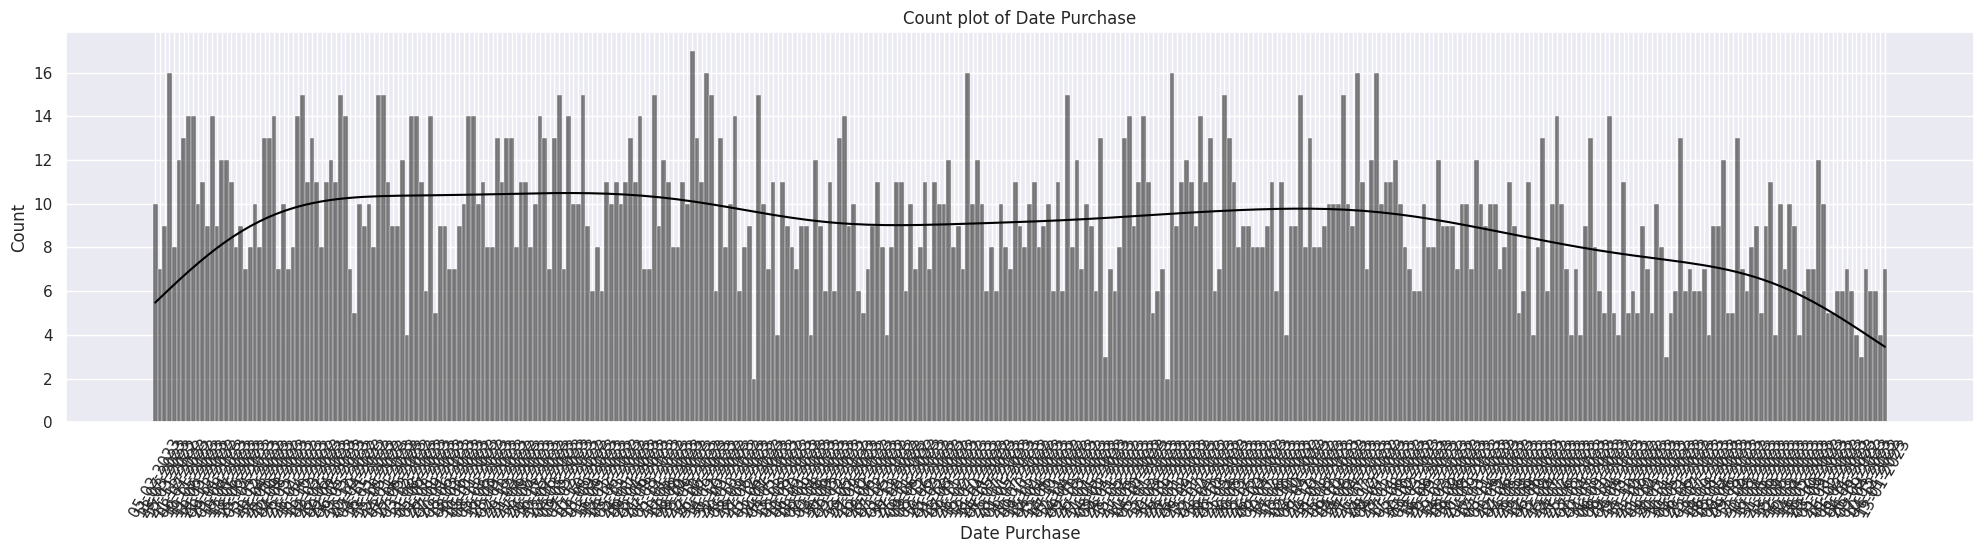

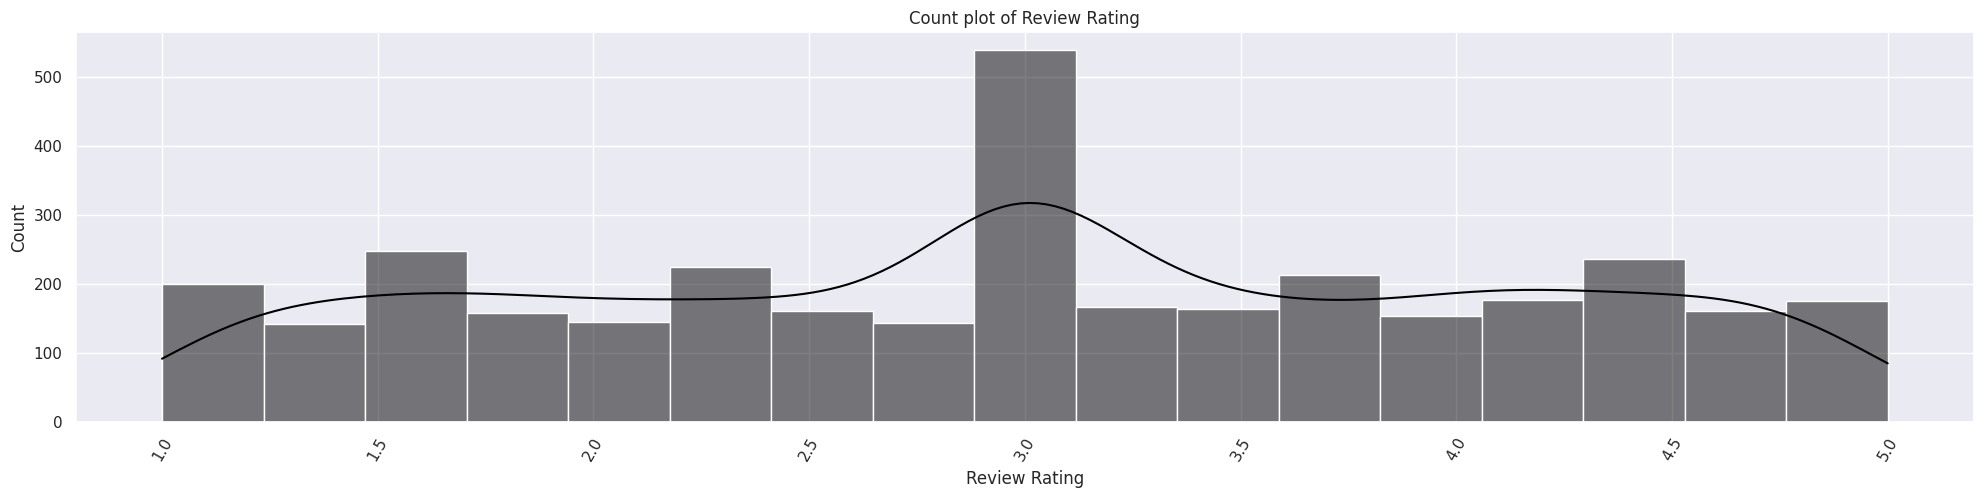

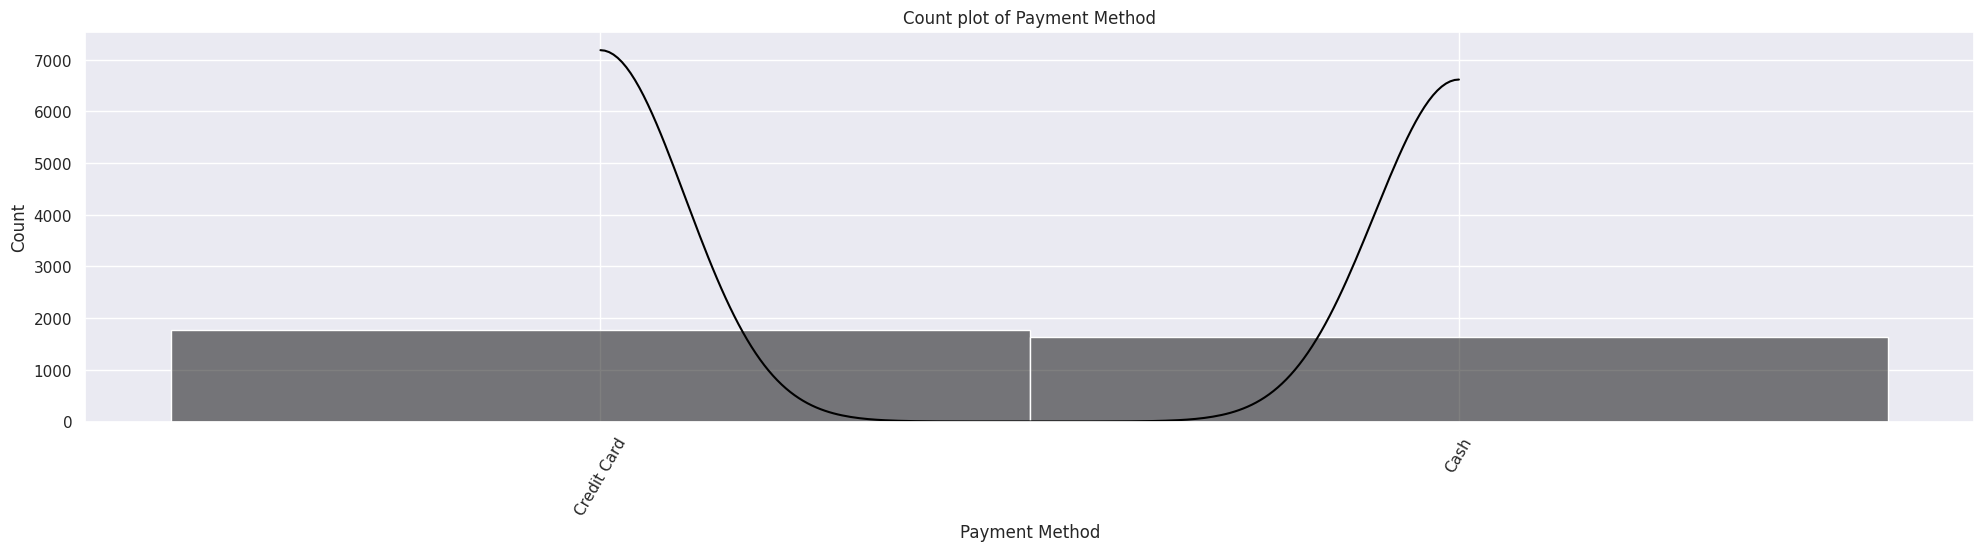

In [11]:
#HISTOGRAM PLOT
for features in cols:
    if features in df.columns:
        plt.figure(figsize=(20,5))
        sns.histplot(df[features].dropna(),color='black',kde=True)
        plt.title(f'Count plot of {features}')
        plt.xlabel(features)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.xticks(rotation=60)
        plt.show()

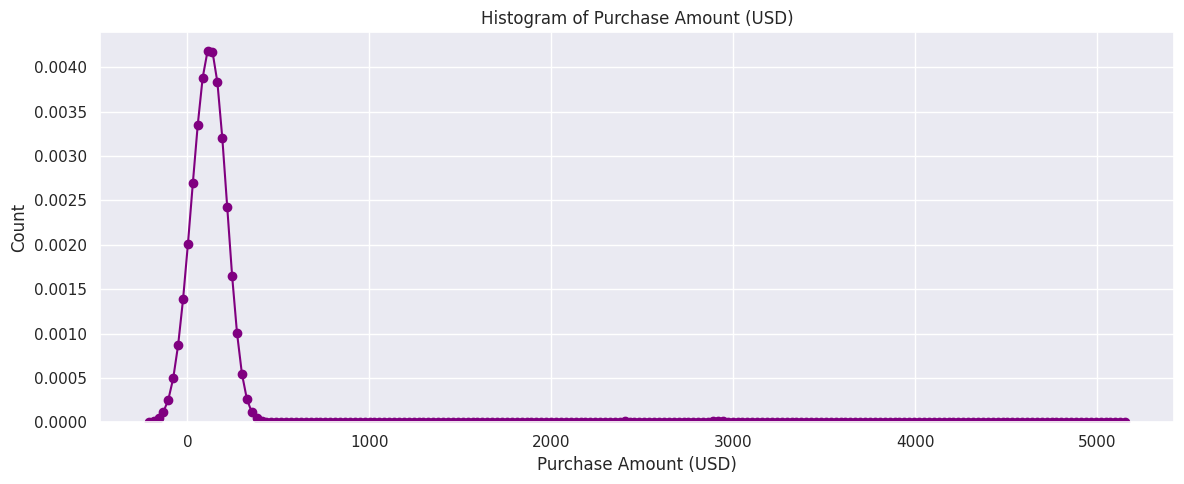

In [12]:

plt.figure(figsize=(12,5))
sns.kdeplot(df['Purchase Amount (USD)'].dropna(),marker='o',color='purple')
plt.title(f'Histogram of Purchase Amount (USD)')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

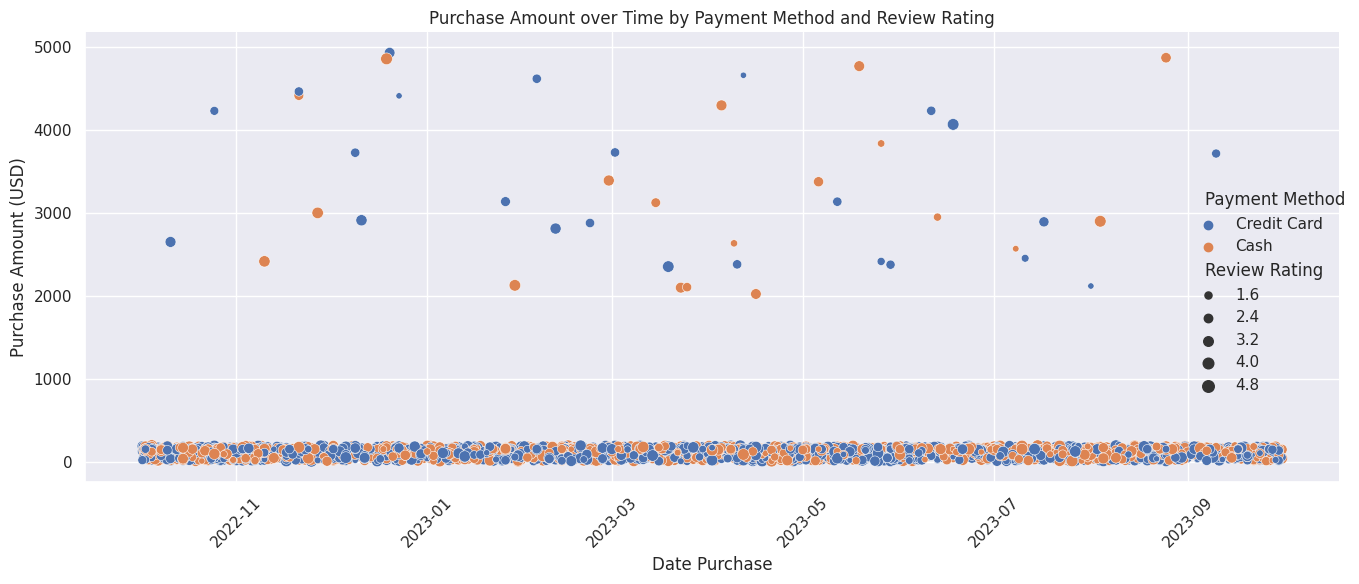

In [13]:
# Convert date to datetime format
df['Date Purchase'] = pd.to_datetime(df['Date Purchase'], dayfirst=True)

# Plot using sns.relplot
sns.relplot(
    data=df,
    x='Date Purchase',
    y='Purchase Amount (USD)',
    hue='Payment Method',
    size='Review Rating',
    kind='scatter',
    height=6,
    aspect=2
)

plt.title('Purchase Amount over Time by Payment Method and Review Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Statistical estimation

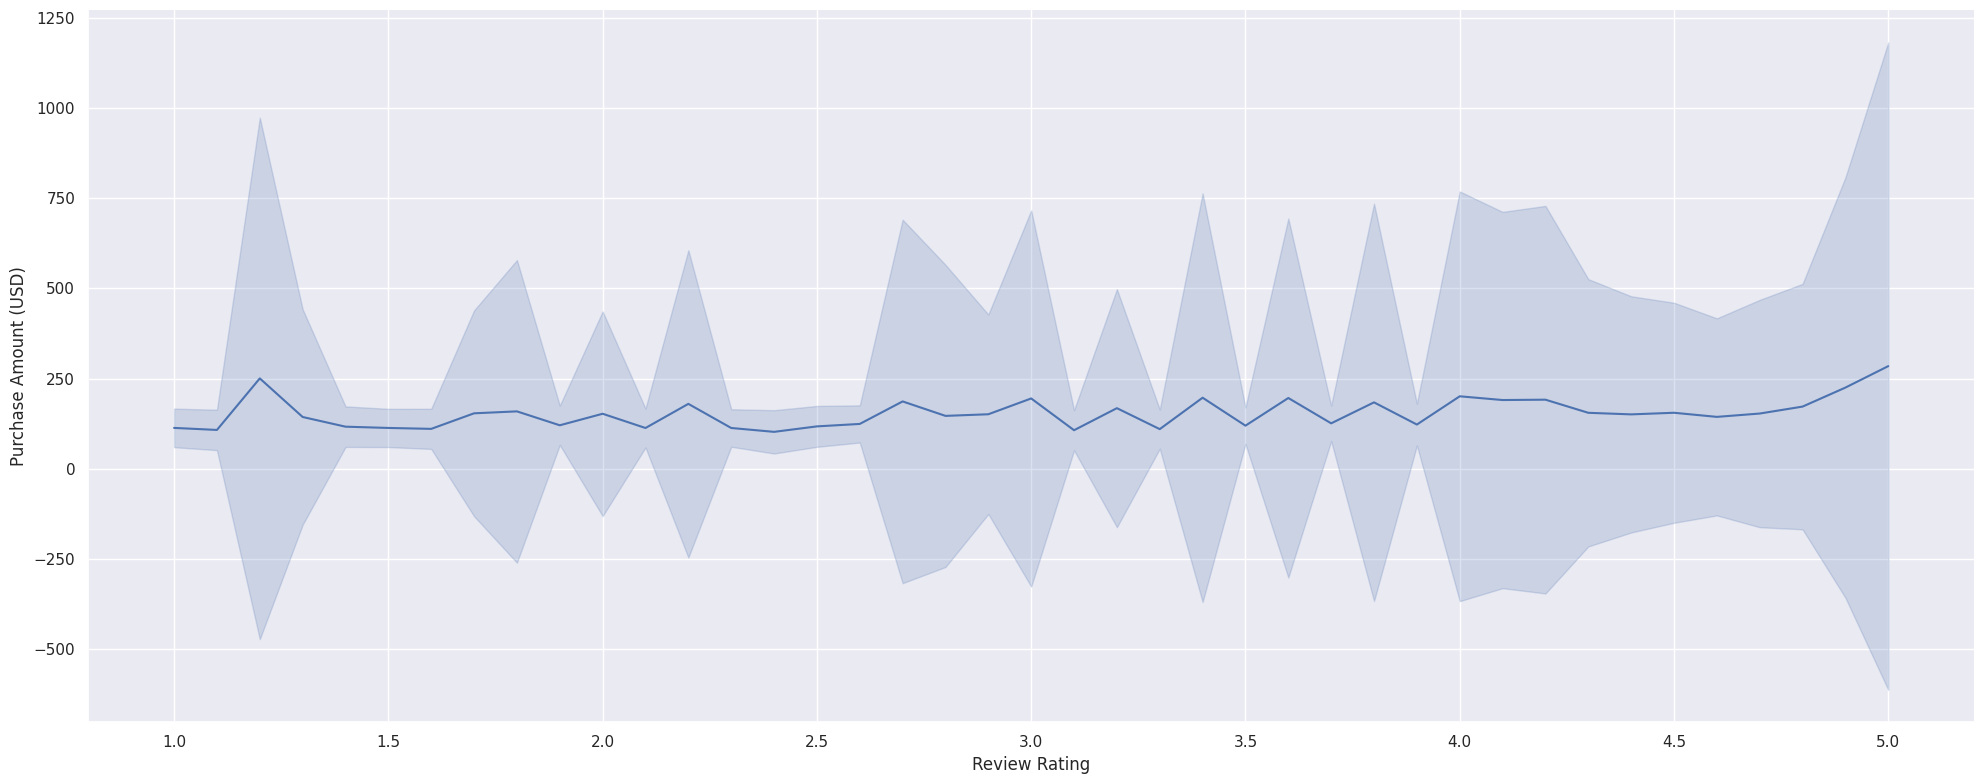

In [14]:
sns.relplot(
    data=df,
    x='Review Rating',
    y='Purchase Amount (USD)',
    kind='line',
    estimator='mean',  # Default is 'mean'
    ci='sd',           # Confidence interval (can be 'sd', '95', or None)
    height=8,
    aspect=2.5
)


<Figure size 1500x500 with 0 Axes>

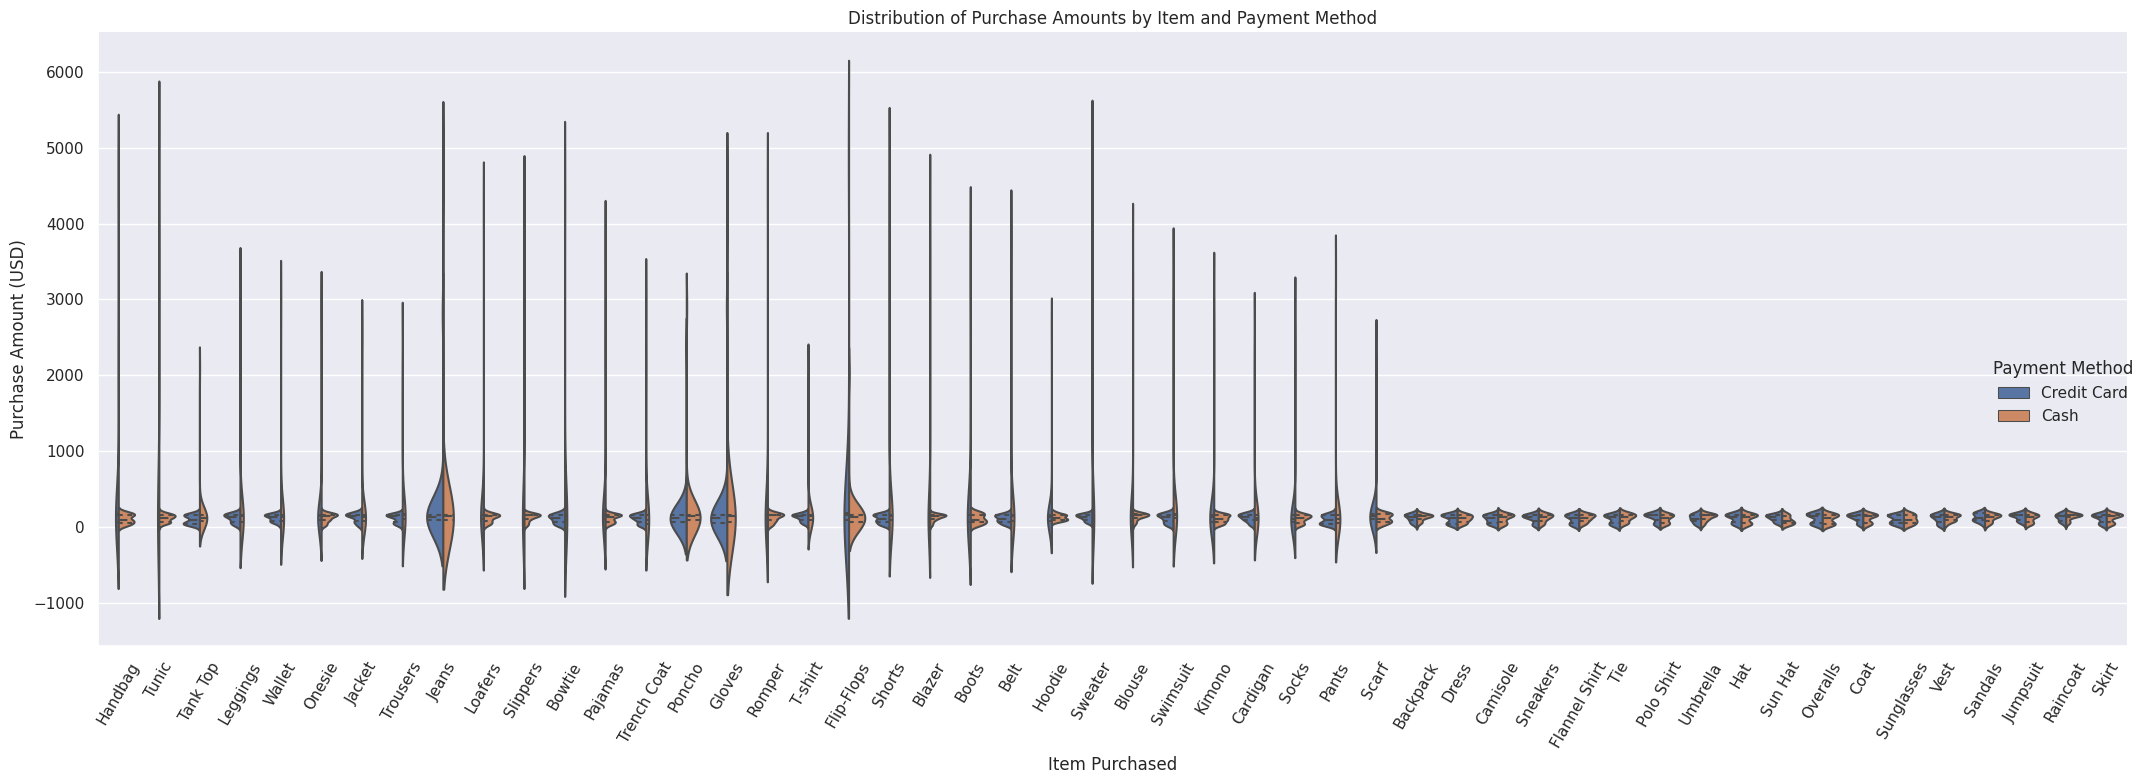

In [15]:
plt.figure(figsize=(15,5))
sns.catplot(
    data=df,
    kind="violin",
    x="Item Purchased",
    y="Purchase Amount (USD)",
    hue="Payment Method",
    split=True,         
    inner="quart",     
    height=8,     
    aspect=2.5
)


plt.title("Distribution of Purchase Amounts by Item and Payment Method")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

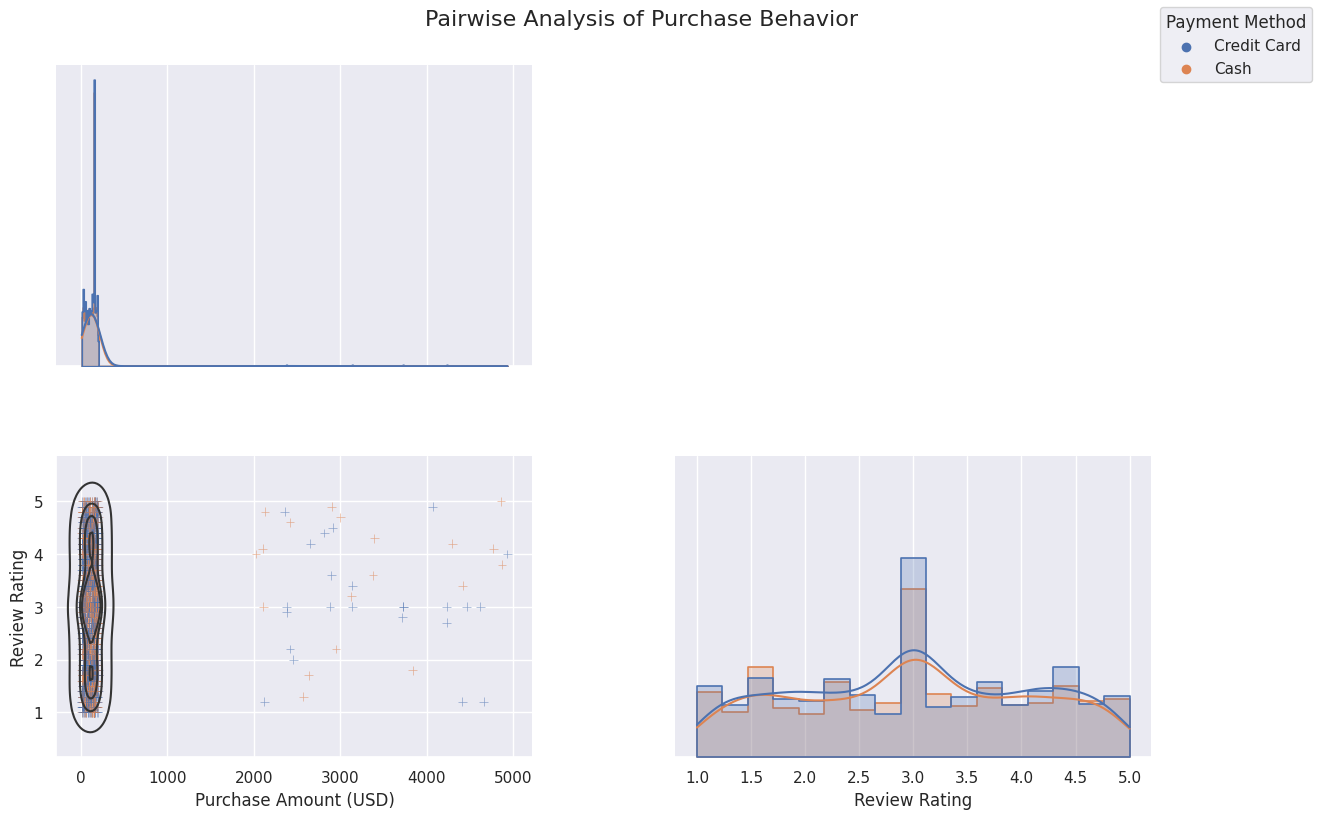

In [16]:
cols = ['Purchase Amount (USD)', 'Review Rating']
df_clean = df[cols + ['Payment Method']].dropna()

#
g = sns.PairGrid(
    df_clean,
    hue="Payment Method",
    corner=True,
    height=4,        # each subplot's height (inches)
    aspect=1.5       # make each subplot wider
)

# Plot lower triangle
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+", s=40, alpha=0.6)  # Bigger and semi-transparent

# Plot diagonal
g.map_diag(sns.histplot, element="step", linewidth=1.2, kde=True)

# Add legend and title
g.add_legend(frameon=True, title="Payment Method", loc="upper right")
g.fig.suptitle("Pairwise Analysis of Purchase Behavior", fontsize=16, y=1.02)

# Optional: adjust spacing
plt.subplots_adjust(top=0.95, wspace=0.3, hspace=0.3)
plt.show()


In [17]:
df

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.00,2023-02-05,3.0,Credit Card
1,4115,Tunic,2456.00,2023-07-11,2.0,Credit Card
2,4019,Tank Top,2102.00,2023-03-23,4.1,Cash
3,4097,Leggings,3126.00,2023-03-15,3.2,Cash
4,3997,Wallet,3003.00,2022-11-27,4.7,Cash
...,...,...,...,...,...,...
3395,4118,Shorts,37.00,2023-07-09,2.7,Cash
3396,4056,Slippers,176.00,2023-03-16,2.5,Cash
3397,3991,Onesie,156.71,2022-10-03,2.4,Credit Card
3398,4042,Sandals,128.00,2023-01-01,1.8,Cash


hh

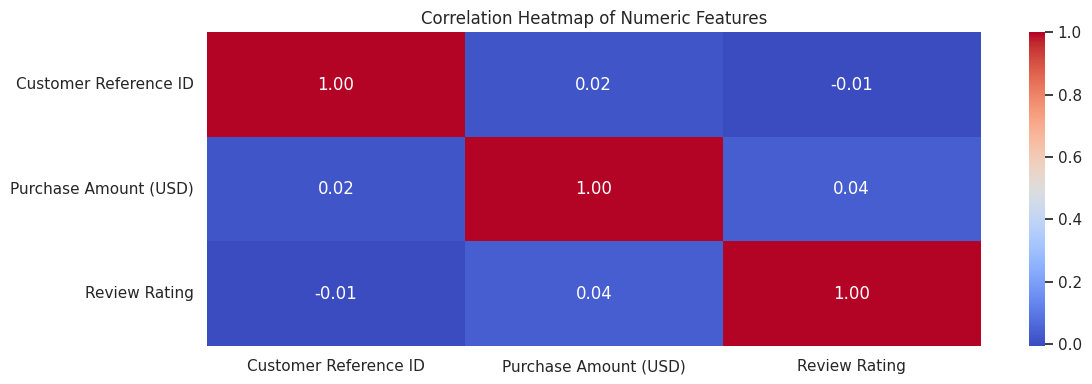

In [18]:
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 3:
    plt.figure(figsize=(12,4))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()

# FEATURE ENGINEERING

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
lab_col = ['Item Purchased','Date Purchase', 'Payment Method']

In [21]:
le = LabelEncoder()

In [22]:
for column in lab_col:
    df[column] = le.fit_transform(df[column])

# Correlation Matrix after Feature Engineering

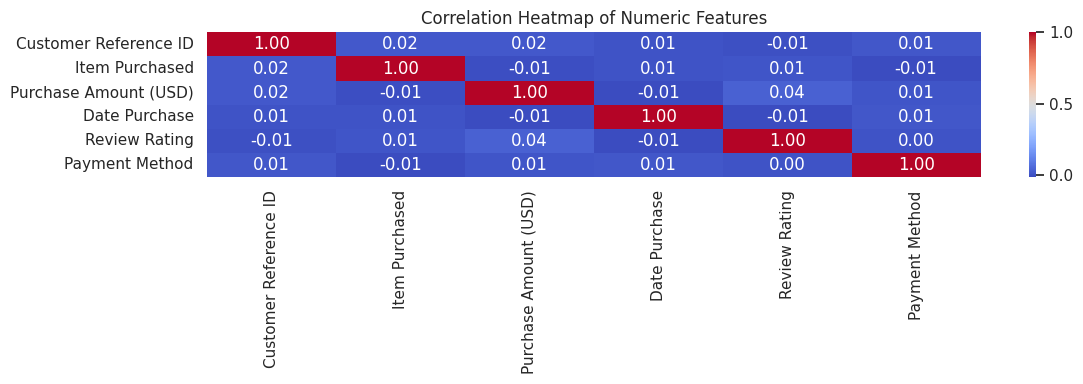

In [23]:
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 3:
    plt.figure(figsize=(12,4))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()

In [24]:
df.columns

Index(['Customer Reference ID', 'Item Purchased', 'Purchase Amount (USD)',
       'Date Purchase', 'Review Rating', 'Payment Method'],
      dtype='object')

In [25]:
from sklearn.preprocessing import StandardScaler

# Columns you want to scale
columns_to_scale = ['Item Purchased', 'Purchase Amount (USD)', 'Review Rating']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling directly to original DataFrame
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


# MODEL SECTION

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [27]:
X = df.drop(columns=['Date Purchase','Customer Reference ID','Payment Method'])
y = df['Payment Method']

In [28]:
X

,Item Purchased,Purchase Amount (USD),Review Rating
0,-0.794402,1.182878e+01,0.000776
1,1.483089,6.095031e+00,-0.908445
2,1.207030,5.156637e+00,1.000918
3,-0.311298,7.871089e+00,0.182620
4,1.690134,7.545036e+00,1.546450
...,...,...,...
3395,0.516881,-3.173307e-01,-0.271991
3396,0.654911,5.113493e-02,-0.453835
3397,-0.173268,3.898282e-07,-0.544757
3398,0.378851,-7.610499e-02,-1.090289


In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [30]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "KNeighbors": KNeighborsClassifier(),
    "SVC": SVC(),
    "XGBoost": XGBClassifier(verbosity=0, use_label_encoder=False)
}



In [31]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        'Model': name,
        'Accuracy': round(accuracy, 4),
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'F1 Score': round(f1, 4)
    })



In [32]:
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
print(results_df)

                Model  Accuracy  Precision  Recall  F1 Score
1        DecisionTree    0.5162     0.5154  0.5162    0.5152
5          KNeighbors    0.5162     0.5151  0.5162    0.5146
0  LogisticRegression    0.5132     0.2634  0.5132    0.3481
2        RandomForest    0.5132     0.5121  0.5132    0.5115
4            AdaBoost    0.4985     0.4911  0.4985    0.4713
6                 SVC    0.4971     0.4630  0.4971    0.3993
3    GradientBoosting    0.4956     0.4905  0.4956    0.4810
7             XGBoost    0.4941     0.4926  0.4941    0.4920


# BEST RUSULT PLOT

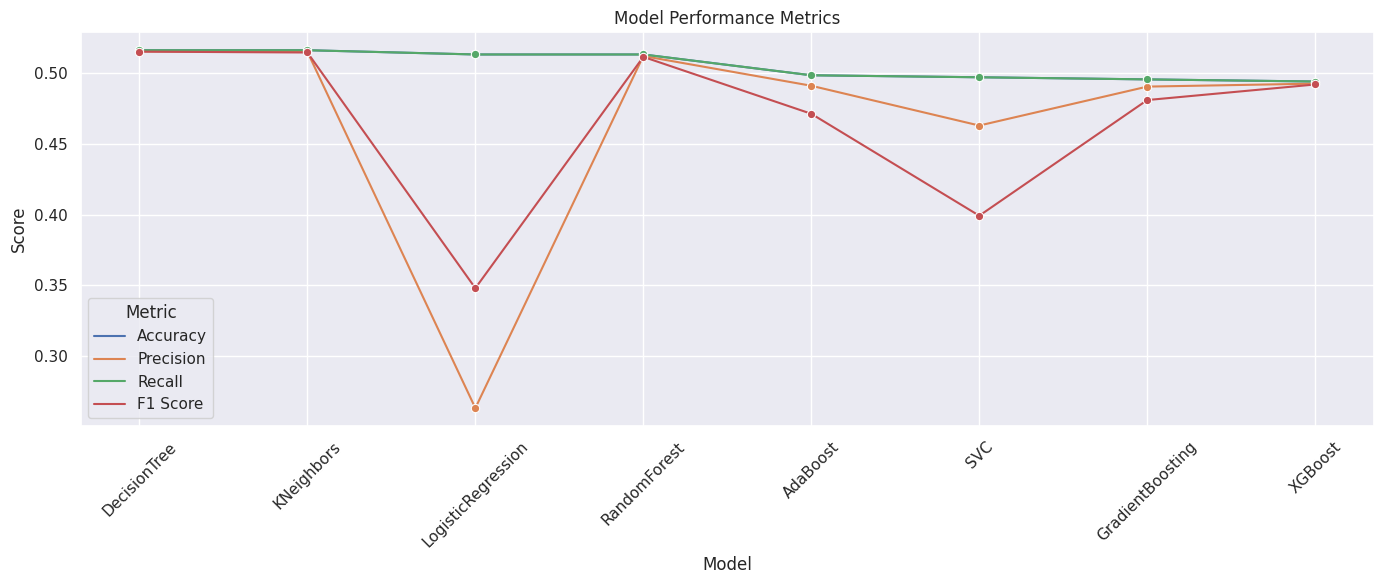

In [33]:
# Melt for all metrics
metrics_df = results_df.melt(id_vars=['Model'], value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score'],
                             var_name='Metric', value_name='Score')

plt.figure(figsize=(14, 6))
sns.lineplot(data=metrics_df, x='Model', y='Score', hue='Metric', marker='o')
plt.title("Model Performance Metrics")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Cross-Val

In [34]:
# Scorers for weighted average (good for imbalanced classes)
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted', zero_division=0),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

In [35]:
cv_results = []

for name, model in models.items():
    scores = {}
    for metric_name, scorer in scoring.items():
        score = cross_val_score(model, X, y, cv=5, scoring=scorer)
        scores[metric_name] = round(score.mean(), 4)
    
    cv_results.append({
        'Model': name,
        'Accuracy': scores['accuracy'],
        'Precision': scores['precision'],
        'Recall': scores['recall'],
        'F1 Score': scores['f1']
    })

In [36]:
cv_results_df = pd.DataFrame(cv_results).sort_values(by='Accuracy', ascending=False)
print(cv_results_df)

                Model  Accuracy  Precision  Recall  F1 Score
0  LogisticRegression    0.5176     0.3548  0.5176    0.3730
6                 SVC    0.5174     0.4443  0.5174    0.3850
7             XGBoost    0.5059     0.5048  0.5059    0.5048
1        DecisionTree    0.5056     0.4989  0.5024    0.5006
5          KNeighbors    0.5000     0.4990  0.5000    0.4991
3    GradientBoosting    0.4959     0.4902  0.4947    0.4836
2        RandomForest    0.4938     0.4978  0.4988    0.5014
4            AdaBoost    0.4938     0.4865  0.4938    0.4777


# CROSS-VAL BEST RUSULT PLOT

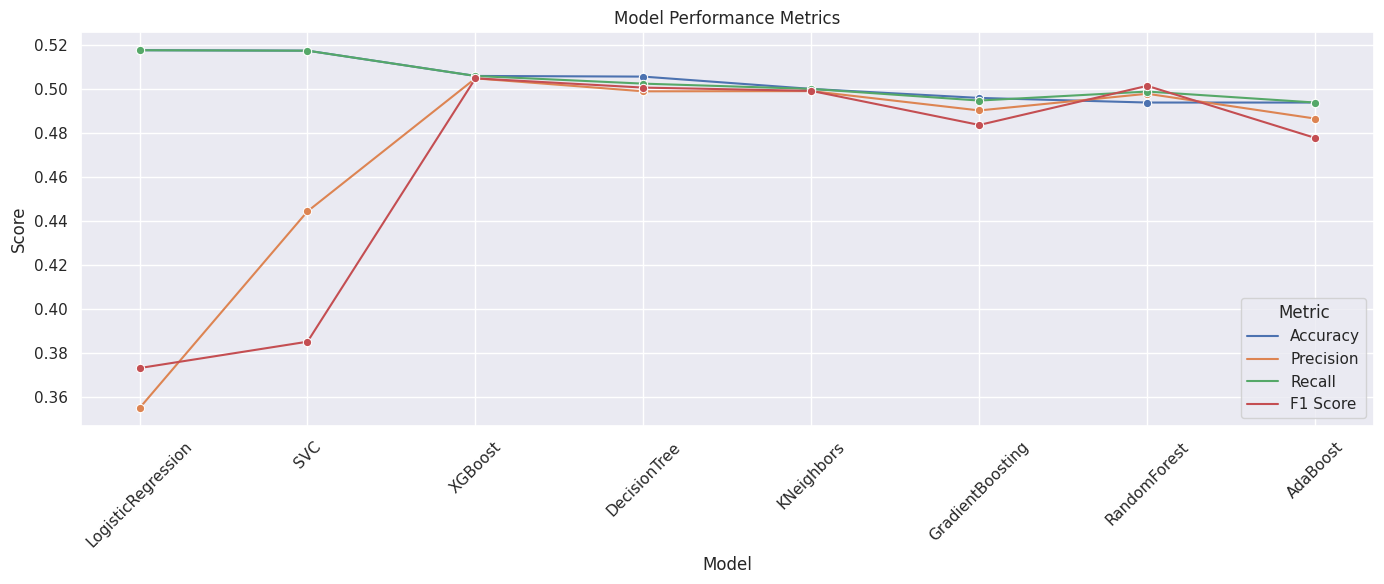

In [37]:
# Melt for all metrics
metrics_df = cv_results_df.melt(id_vars=['Model'], value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score'],
                             var_name='Metric', value_name='Score')

plt.figure(figsize=(14, 6))
sns.lineplot(data=metrics_df, x='Model', y='Score', hue='Metric', marker='o')
plt.title("Model Performance Metrics")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
